# CBE 562 Homework 4

#### Tyson Wheelwright

Problem 1. MLE for Gaussian
Assume that you have a set of random observations x_ω, ω ∈ S. Show that the maximum likelihood
estimates of the parameters of a Gaussian model N (µ, σ^2) are given by µ = E^\hat[X] and σ^2 = V^\hat[X].
Problem 2. MLE for Gaussian using Numerical Optimization
Use MLE and the numerical optimization solver fmincon to find the parameters of N (µ, σ2
) that best
fit the data data mlegauss.dat.
Verify that the solver will crash if you provide an initial guess for the parameters of zero; why does it
crash?
Confirm that the estimates provided by fmincon correspond to the empirical mean and variance (as
shown in Problem 1).
Make a 3D plot of the log likelihood function against its two parameters µ, σ2 and verify (visually) that
its maximum is located at the estimates obtained by fmincon.
Problem 3. Particle Size Distribution.
Laser diffraction was used to determine the particle size distribution of a drug product and this reports
the following data:
Particle size (µ m) 90 200 400
Fraction of particles below size (−) 0.1 0.5 0.9
Determine whether the data follows a log normal distribution and, if so, report the parameters that best
fit the data.
Problem 4. Adhesive Failure
You have run 100 experiments for a new adhesive material to determine its failure time. The outcomes
of the experiments are recorded in failure data mle.dat (units in months). It is known that the failure
time follows an exponential distribution.
1. Determine the maximum likelihood estimate for the parameter of the exponential model.
2. Determine the 95% confidence interval for maximum likelihood estimate.
3. Determine the precision of estimate (its standard deviation). Comment whether such a precision is
satisfactory (compare precision to estimate value).
4. Determine number of experiments needed to obtain a precision that is 1% of your estimate.

## Problem 1

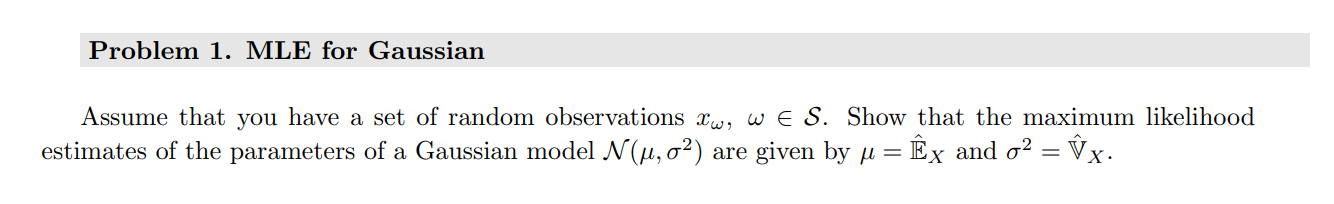

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import cumtrapz
import seaborn as sns

Not sure if you wanted this written out, or computationally solved.   
So I'm going to computationally solve it. 

In [24]:
#number of samples
obvs = 100000

#make up some random sample data
true_mean = 2.0
true_var = 1.5**2
np.random.seed(0)
x = np.random.normal(true_mean, 1.5, obvs)  

#calculate the maximum likelihood estimates from the synthetic data
est_mean = np.mean(x)
est_var = np.var(x)

#print results
print("max likelihood estimates:")
print(f"{est_mean = :.2f}")
print(f"{est_var = :.2f}")

print("theoretical:")
print(f"{true_mean = :.2f}")
print(f"{true_var = :.2f}")

max likelihood estimates:
est_mean = 2.00
est_var = 2.24
theoretical:
true_mean = 2.00
true_var = 2.25


I suppose I can try and show the math too.   


Here's an example from the book of a maximum log likelihood function:

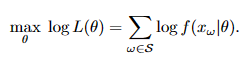

Here's the pdf of the gaussian:

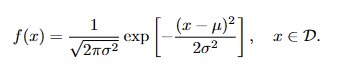

So here's what the log likelihood for the gaussian looks like:

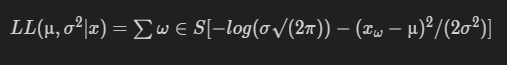

We do some calculus, (differentiate each with respect to mu, and then set it equal to 0)  
For mu we get the sum of 1/the total numer *Sum of all x_omega    
That is equal to the mean of the sample.  
For sigma we get that the variance is the sum of the variance   
That is equal to the variance of the sample.  

## Problem 2

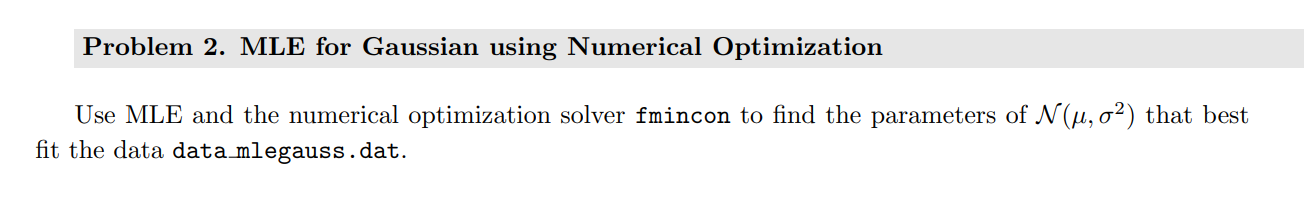

In [37]:
df = pd.read_csv('../Matlab/Data/data_mlegauss.dat', delimiter='\s+', header=None, names=['mle_vals'])

#now we need to optimize the likelihood function
#we can do this with scipy.optimize.minimize
from scipy.optimize import minimize

#we need to define the negative log likelihood function
def find_neg_log_likelihood(params, data):
    mu, sigma = params
    neg_log_likelihood = -np.sum(stats.norm.logpdf(data, loc=mu, scale=sigma))
    return neg_log_likelihood

#now we can use the scipy minimize solver
init = [1, 2]

final = minimize(find_neg_log_likelihood, init, args=(df['mle_vals'],))

mu_mle, sigma_mle = final.x

#print results:
print("max likelihood estimates:")
print(f"{mu_mle = :.2f}")
print(f"{sigma_mle = :.2f}")

max likelihood estimates:
mu_mle = 2.25
sigma_mle = 2.31


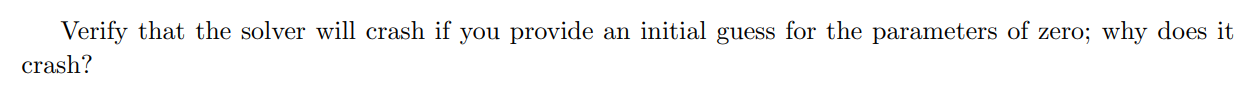

In [27]:
init = [0,0]
final1 = minimize(find_neg_log_likelihood, init, args=(df['mle_vals'],))

/Users/macair/Documents/github/stats_modeling/py10venv/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2024: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


It crashes because we're dividing by zero- because when sigma is 0, it results in a divide by 0 error  
Because the likelihood function has a sigma^2 in the denominator

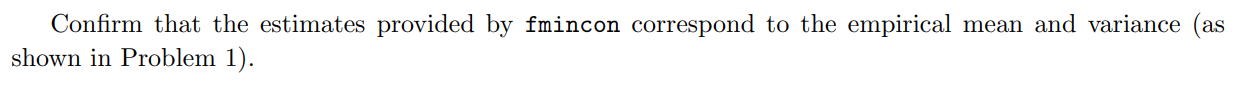

In [38]:
#calculate the emprircal mean and variance
emp_mean = np.mean(df['mle_vals'])
emp_var = np.var(df['mle_vals'])

#compare results to the solver values
print("solver estimates:")
print(f"mle mean: {final.x[0]:.2f}\nempirical mean: {emp_mean:.2f}")
print(f"mle variance: {final.x[1]:.2f}\nempirical variance: {np.sqrt(emp_var):.2f}")
#gotta take the sqrt

solver estimates:
mle mean: 2.25
empirical mean: 2.25
mle variance: 2.31
empirical variance: 2.31


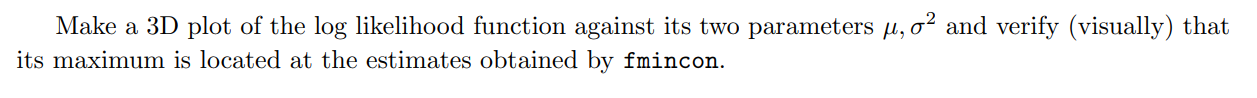

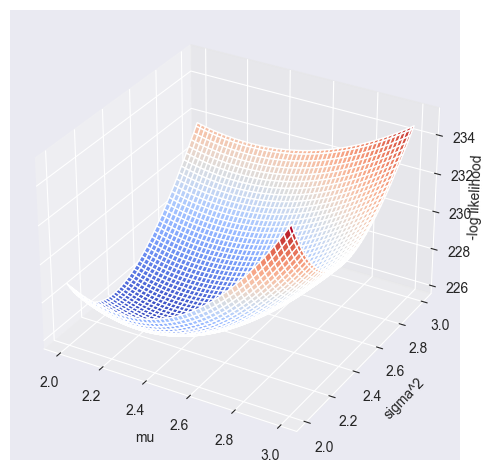

In [68]:
#make a 3D plot of the likelihood function against the two parameters mu and sigma

# let's make a meshgrid 
mus = np.linspace(2, 3, 100)
sigmas = np.linspace(2, 3, 100)
m_mesh, s_mesh = np.meshgrid(mus, sigmas)

#iterate over the meshgrid and calculate the negative log likelihood for each point
neg_log_likelihood_values = np.zeros(m_mesh.shape)
for i in range(m_mesh.shape[0]):
    for j in range(m_mesh.shape[1]):
        params = [m_mesh[i, j], s_mesh[i, j]]
        neg_log_likelihood_values[i, j] = find_neg_log_likelihood(params, df['mle_vals'])

#plot the meshgrid in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(m_mesh, s_mesh, neg_log_likelihood_values, cmap='coolwarm')
ax.set_xlabel('mu')
ax.set_ylabel('sigma^2')
ax.set_zlabel('-log likelihood', labelpad=-3)
plt.show()

I did the minimum instead of the max, but it is looking like the minmum matches the solver estimates from earlier:  
mle minimized mean estimate: 2.25  
mle minimized variance estimate: 2.31  

## Problem 3

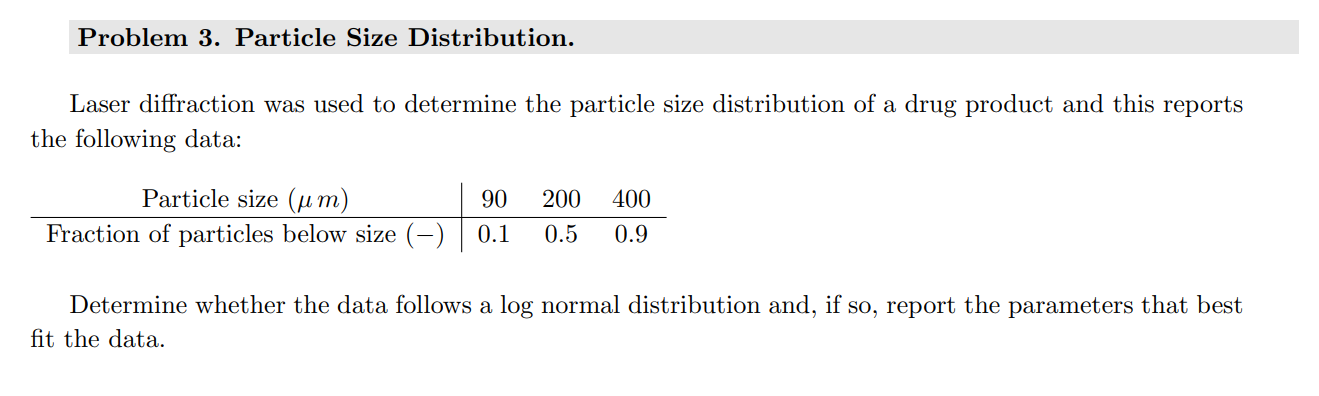

## Problem 4

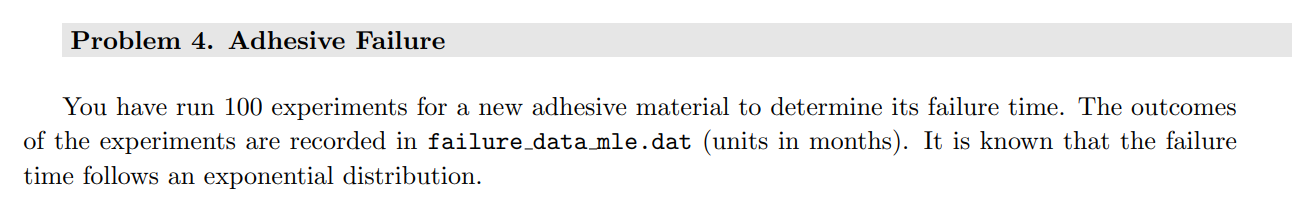

In [21]:
df = pd.read_csv('../Matlab/Data/failure_data_mle.dat', delimiter='\s+', header=None, names=['failure_times'])

,failure_times
0,7.376625
1,3.562043
2,74.292192
3,3.261881
4,16.498714
...,...
95,73.473932
96,20.310653
97,27.227518
98,159.517550


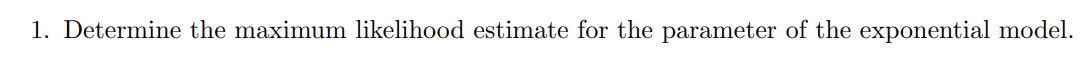

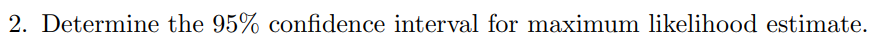

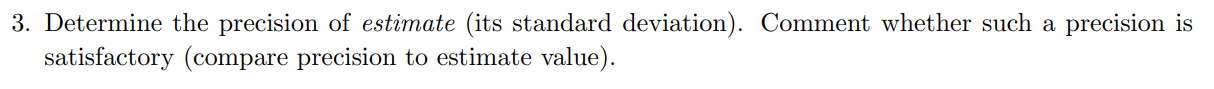

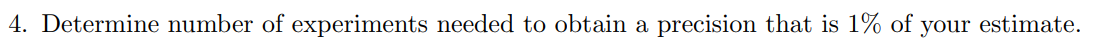